<a href="https://colab.research.google.com/github/DickyTegarJ/data_analyst/blob/main/samba_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Samba Commerce**

Tujuan : memperoleh pemahaman yang lebih jelas mengenai operasi bisnis samba commerce.


In [2]:
import pandas as pd

df1 = pd.read_csv('samba_commerce_history.csv')
df2 = pd.read_csv('samba_commerce_order.csv')

# Lakukan inner join berdasarkan kolom 'id'
result_df = pd.merge(df1, df2, on='order_id', how='inner')

In [3]:
df3 = pd.read_csv('samba_commerce_payment.csv')

# Lakukan inner join berdasarkan kolom 'id'
df = pd.merge(result_df, df3, on='order_id', how='inner')

# Tampilkan hasil inner join
df.head()

,order_id,order_purchase_timestamp,order_approved_at,seller_dispatch_time,customer_delivery_time,customer id,order_status,customer_city,customer_state,product_id,seller_id,price,product_category_name,qty_item,payment_type,payment_installments,total_payment_value
0,f6e3e816961a8,31/01/2022 23:58,01/02/2022 02:55,Fast,Fast,251fe-68cbe,delivered,belo horizonte,MG,4e46ddbd01,b372e-aa7a38,35,Fashion Bags and Accessories,1,credit_card,1,50.10
1,5d6b2abb1a6c5,31/01/2022 23:46,01/02/2022 02:10,Fast,Fast,fbb3a-cf8e6,delivered,patrocinio,MG,5a42f20099,40495-012416,37.48,sport leisure,1,credit_card,1,49.96
2,4376d8693594f,31/01/2022 23:44,01/02/2022 02:55,Fast,Fast,edbd8-03547,delivered,rio de janeiro,RJ,18b0ebaeb9,85d9e-97bb13,31.9,computer accessories,1,credit_card,2,46.00
3,28553d39cd4b5,31/01/2022 23:38,02/02/2022 02:55,Fast,Fast,158ff-877a6,delivered,sao jose,SC,3f14d4497e,f457c-1220dd,84.9,computer accessories,2,boleto_ticket,1,200.48
4,5bb486ecd4fdd,31/01/2022 23:38,02/02/2022 02:55,Fast,Fast,158ff-877a6,delivered,sao jose,SC,36f6025b60,f457c-1220dd,89.9,computer accessories,1,boleto_ticket,1,105.28


Tabel:

1. order_id = id order dari setiap pembelian.
2. order_purchase_timestamp = waktu customer membeli barang.
3. order_approved_at = waktu atau tanggal ketika pesanan dari pelanggan disetujui oleh sistem atau pihak penjual.
4. seller_dispatch_time = waktu seller untuk mengirimkan atau mengirimkan produk setelah menerima pesanan dari pembeli.
5. customer_delivery_time = waktu yang diperlukan untuk mengirimkan atau mengantarkan produk dari penjual kepada pelanggan setelah pesanan disetujui dan diproses.
6. customer_id = id customer.
7.  order_status = status pengiriman barang ke pelanggan.
8. customer_city = kota customer dinegara brazil.
9. customer_state = lokasi geografis customer.
10. product_id = id dari setiap product.
11. seller_id = id dari setiap seller atau penjual.
12. price = harga dari 1 produk.
13. product_category_name = category dari product commerce.
14. qty_item = jumlah barang yang dipesan dari sekali order.
15. payment_type = tipe pembayaran nasabah.
16. payment_installment = proses pencicilan dari setiap customer.
17. total_payment_value = total yang dibayarkan.

**checking missing value**

In [4]:
df.isnull().sum()

order_id                    0
order_purchase_timestamp    0
order_approved_at           0
seller_dispatch_time        0
customer_delivery_time      0
customer id                 0
order_status                0
customer_city               0
customer_state              0
product_id                  0
seller_id                   0
price                       0
product_category_name       0
qty_item                    0
payment_type                0
payment_installments        0
total_payment_value         0
dtype: int64

**checking duplicated**

In [5]:
df.duplicated().sum()

0

**checking data type**

In [6]:
df.dtypes

order_id                    object
order_purchase_timestamp    object
order_approved_at           object
seller_dispatch_time        object
customer_delivery_time      object
customer id                 object
order_status                object
customer_city               object
customer_state              object
product_id                  object
seller_id                   object
price                       object
product_category_name       object
qty_item                     int64
payment_type                object
payment_installments         int64
total_payment_value         object
dtype: object

terdapat beberapa kolom yang tidak sesuai dan harus diperbaiki yakni:

*   order_purchase_timestamp, order_approved_at kita ubah menjadi datetime
*   price, total_payment_value kita ubah menjadi float64



In [7]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%d/%m/%Y %H:%M')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], format='%d/%m/%Y %H:%M')


In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['total_payment_value'] = pd.to_numeric(df['total_payment_value'], errors='coerce')

# Menampilkan DataFrame setelah perubahan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49544 entries, 0 to 49543
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  49544 non-null  object        
 1   order_purchase_timestamp  49544 non-null  datetime64[ns]
 2   order_approved_at         49544 non-null  datetime64[ns]
 3   seller_dispatch_time      49544 non-null  object        
 4   customer_delivery_time    49544 non-null  object        
 5   customer id               49544 non-null  object        
 6   order_status              49544 non-null  object        
 7   customer_city             49544 non-null  object        
 8   customer_state            49544 non-null  object        
 9   product_id                49544 non-null  object        
 10  seller_id                 49544 non-null  object        
 11  price                     49543 non-null  float64       
 12  product_category_n

In [9]:
df = df.rename(columns={'customer id': 'customer_id'})

In [10]:
df.describe()

,price,qty_item,payment_installments,total_payment_value
count,49543.000000,49544.000000,49544.000000,48830.000000
mean,124.640217,1.140663,3.045979,142.035886
std,188.440165,0.532509,2.811963,136.219606
min,2.290000,1.000000,1.000000,-953.510000
25%,41.490000,1.000000,1.000000,61.460000
50%,78.970000,1.000000,2.000000,102.640000
75%,139.900000,1.000000,4.000000,171.797500
max,6735.000000,21.000000,24.000000,999.680000


terdapat nilai minus pada total payment value, terdapat outlier pada kolom price tapi hal ini mungkin saja suatu barang memiliki nilai yang sangat mahal.

In [11]:
df['total_payment_value'] = df['total_payment_value'].abs()

# **Insight**

menghitung jumlah total order, total customer, dan total seller dari samba commerce data

In [12]:
jumlah_order_id_unique = df['order_id'].nunique()
jumlah_customer_id_unique = df['customer_id'].nunique()
jumlah_seller_id_unique = df['seller_id'].nunique()
jumlah_product_unique = df['product_category_name'].nunique()
rata_rata_qty_item = df['qty_item'].mean()



# Menampilkan hasil
print(f"Jumlah data order_id yang unique: {jumlah_order_id_unique}")
print(f"Jumlah data customer_id yang unique: {jumlah_customer_id_unique}")
print(f"Jumlah data seller_id yang unique: {jumlah_seller_id_unique}")
print(f"Jumlah data product_category_name yang unique: {jumlah_product_unique}")
print(f"Jumlah rata rata item yang dibeli: {rata_rata_qty_item}")

Jumlah data order_id yang unique: 49544
Jumlah data customer_id yang unique: 48022
Jumlah data seller_id yang unique: 1771
Jumlah data product_category_name yang unique: 72
Jumlah rata rata item yang dibeli: 1.1406628451477474


sepanjang periode januaru 2021 - januari 2022 samba commerce beroperasi, terdapat 49544 total pesanan, 48022 total customer, dan 1771 total seller. Jumlah rata-rata customer samba commerce membeli 1 barang.

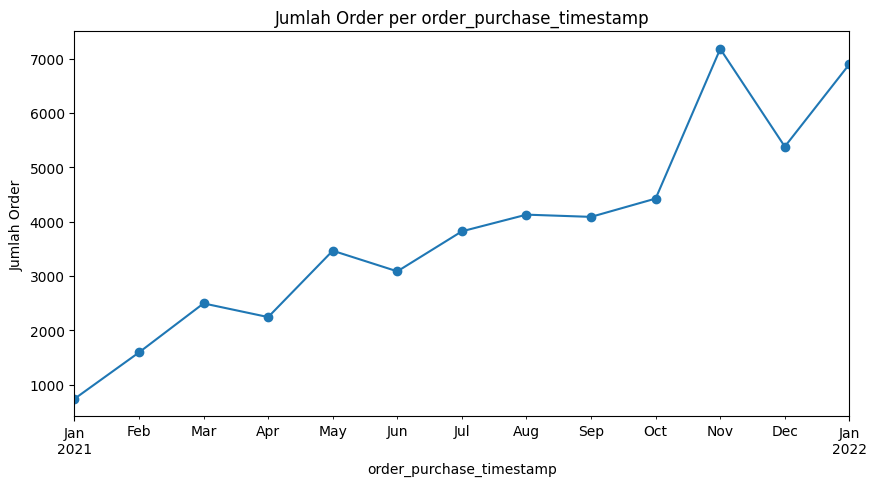

In [13]:
import matplotlib.pyplot as plt

# Konversi format tanggal
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%m %Y')

# Hitung jumlah order_id setiap order_purchase_timestamp
monthly_orders = df.groupby(df['order_purchase_timestamp'].dt.to_period("M")).size()

# Plot time-series
plt.figure(figsize=(10, 5))
monthly_orders.plot(marker='o', linestyle='-')
plt.title('Jumlah Order per order_purchase_timestamp')
plt.xlabel('order_purchase_timestamp')
plt.ylabel('Jumlah Order')
plt.show()

grafik menunjukan trend yang bagus, samba commerce medapatkan order yang signifikan terjadi pada bulan november.

Apa yang terjadi pada bulan itu?

In [14]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%m %Y')

# Hitung jumlah order_id setiap order_purchase_timestamp
monthly = df.groupby(df['order_purchase_timestamp'].dt.to_period("M"))['product_category_name'].nunique()

# Menampilkan hasil
print(monthly)

order_purchase_timestamp
2021-01    42
2021-02    49
2021-03    52
2021-04    56
2021-05    59
2021-06    60
2021-07    61
2021-08    62
2021-09    65
2021-10    63
2021-11    64
2021-12    62
2022-01    66
Freq: M, Name: product_category_name, dtype: int64


In [15]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%m %Y')

# Hitung jumlah order_id setiap order_purchase_timestamp
monthly = df.groupby(df['order_purchase_timestamp'].dt.to_period("M"))['customer_city'].nunique()

# Menampilkan hasil
print(monthly)

order_purchase_timestamp
2021-01     355
2021-02     599
2021-03     768
2021-04     753
2021-05     957
2021-06     872
2021-07     981
2021-08    1005
2021-09    1062
2021-10    1044
2021-11    1383
2021-12    1125
2022-01    1366
Freq: M, Name: customer_city, dtype: int64


In [16]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%m %Y')

# Hitung jumlah order_id setiap order_purchase_timestamp
monthly = df.groupby(df['order_purchase_timestamp'].dt.to_period("M"))['customer_state'].nunique()

# Menampilkan hasil
print(monthly)

order_purchase_timestamp
2021-01    24
2021-02    27
2021-03    27
2021-04    26
2021-05    27
2021-06    27
2021-07    27
2021-08    26
2021-09    27
2021-10    27
2021-11    27
2021-12    26
2022-01    27
Freq: M, Name: customer_state, dtype: int64


didapatkan alasan kenaikan pesanan terjadi karena samba commerce mendapatkan customer_city yang bertambah, pada bulan oktober terdapat 1044 dan bulan november terdapat 1383 kenaikan yang dialami sebanyak 339 customer.

**TOP 10 STATE**

<ipython-input-17-abf687a9c91d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='avg_qty_item', data=res_sorted.head(10), palette='viridis')


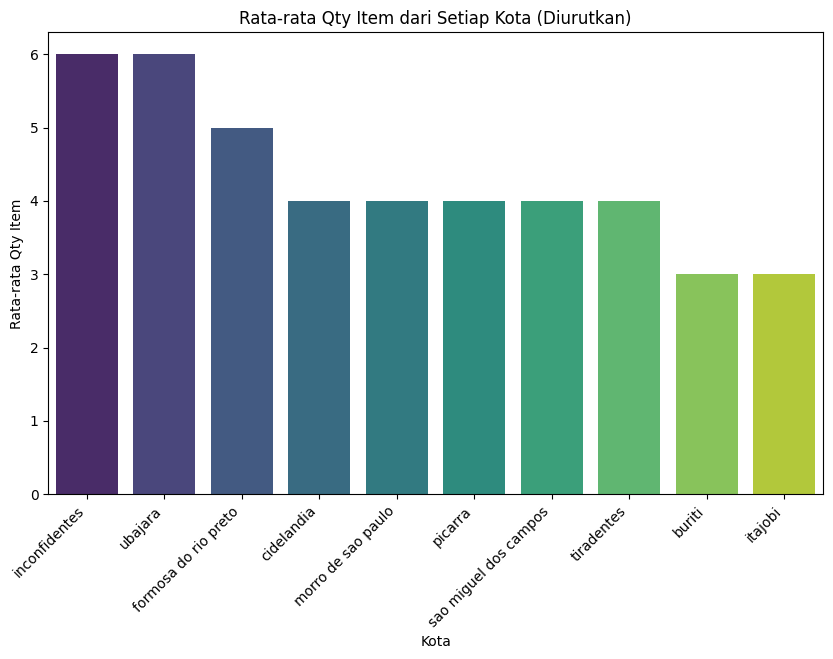

In [17]:
import seaborn as sns

# Mengelompokkan data berdasarkan kota dan menghitung jumlah item dan banyaknya setiap kota
res = df.groupby('customer_city')['qty_item'].agg(['sum', 'count']).reset_index()

# Menambahkan kolom 'avg_qty_item' yang berisi jumlah item dibagi banyaknya setiap kota
res['avg_qty_item'] = res['sum'] / res['count']

# Mengurutkan hasil berdasarkan kolom 'avg_qty_item' secara descending
res_sorted = res.sort_values(by='avg_qty_item', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_city', y='avg_qty_item', data=res_sorted.head(10), palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Kota')
plt.ylabel('Rata-rata Qty Item')
plt.xticks(rotation=45, ha='right')  # Rotasi label kota agar lebih mudah dibaca
plt.title('Rata-rata Qty Item dari Setiap Kota (Diurutkan)')

# Menampilkan plot
plt.show()


samba commerce mendapatkan rata-rata jumlah barang yang dibeli customer terbanyak terdapat pada incofidentes dan ubajara yakni sebanyak 6 barang sekali order.

<ipython-input-18-0274164e4a4a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_state', data=df_filtered, palette='viridis', order=top_cities)


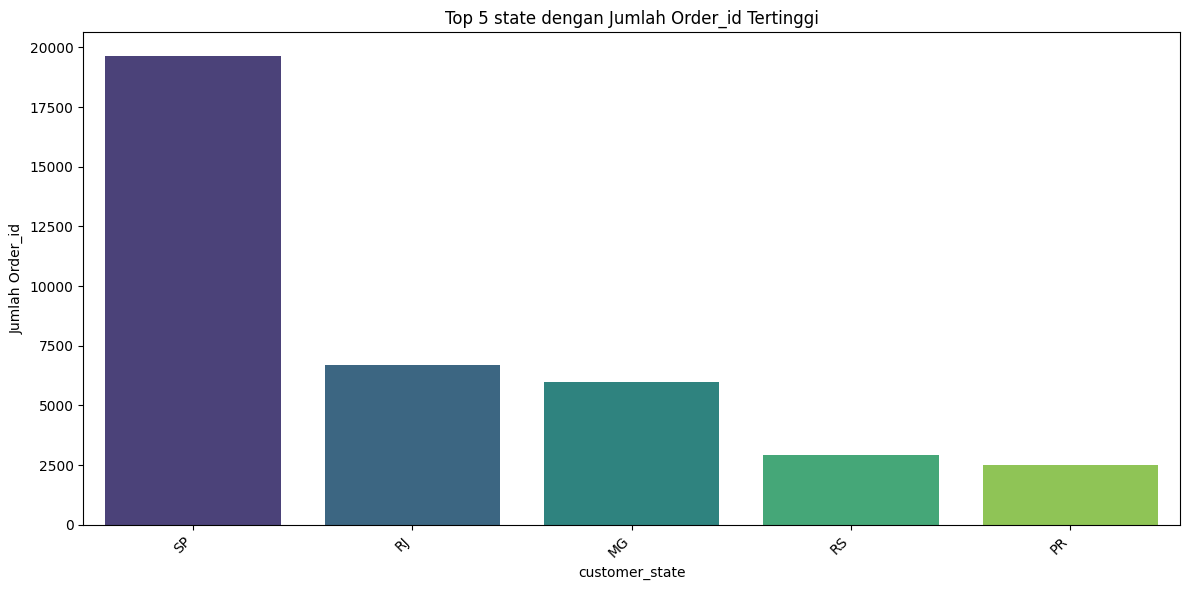

Jumlah banyaknya order sau paulo: 19648
Jumlah banyaknya order sau paulo: 39.657678023575 %


In [18]:
# Menghitung jumlah order untuk setiap kota
state_counts = df['customer_state'].value_counts()

# Memilih 5 kota terbanyak
top_cities = state_counts.head(5).index

# Filter DataFrame untuk hanya memuat 5 kota terbanyak
df_filtered = df[df['customer_state'].isin(top_cities)]

# Membuat countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state', data=df_filtered, palette='viridis', order=top_cities)

# Menambahkan label dan judul
plt.xlabel('customer_state')
plt.ylabel('Jumlah Order_id')
plt.title('Top 5 state dengan Jumlah Order_id Tertinggi')

# Menampilkan plot
plt.xticks(rotation=45, ha='right')  # Rotasi label kota agar lebih mudah dibaca
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

jumlah_order_sp = df[df['customer_state'] == 'SP']['order_id'].nunique()

print(f"Jumlah banyaknya order sau paulo: {jumlah_order_sp}")

presentase_order = (jumlah_order_sp/jumlah_order_id_unique)*100

print(f"Jumlah banyaknya order sau paulo: {presentase_order} %")

jumlah order terbanyak terdapat pada state sao paulo diikuti rio de janeiro dengan perbedaan order sekitar 13.500 order, kota-kota di sau paulo juga yang memiliki jumlah order terbanyak akan tetapi rata-rata customer setiap order yakni 1 barang. Dari data ini samba commerce menerima profit dari order customer di negara bagian sau paulo dengan memperoleh 39.65% order dari keseluruhan order samba commerce dari periode januari 2021 hingga januari 2022.

In [19]:
jumlah_qty_per_customer = df.groupby('seller_id')['qty_item'].sum()

# Mengambil 10 seller_id dengan jumlah qty_item paling banyak
top_10_customers = jumlah_qty_per_customer.nlargest(10)

# Membuat tabel untuk menampilkan 10 seller_id paling banyak qty_item
table_top_10 = pd.DataFrame({'seller_id': top_10_customers.index, 'total_qty_item': top_10_customers.values})

# Menampilkan tabel
print(table_top_10)

      seller_id  total_qty_item
0  cc419-b7556a            1330
1  4a3ca-493884            1311
2  1f50f-523100            1186
3  65602-7e94c0            1044
4  3d871-733cb1             875
5  7a67c-3ad736             846
6  da862-dab84a             833
7  7c67e-b010ab             785
8  cca30-301306             752
9  ea848-f13abc             534


In [20]:
df['customer_delivery_time'].value_counts()

Fast     46287
Delay     3257
Name: customer_delivery_time, dtype: int64

In [21]:
df['seller_dispatch_time'].value_counts()

Fast     44911
Delay     4633
Name: seller_dispatch_time, dtype: int64

In [22]:
df['order_status'].value_counts()

delivered    49544
Name: order_status, dtype: int64

In [23]:
jumlah_qty_per_customer = df.groupby('product_category_name')['qty_item'].sum()

# Mengambil 10 seller_id dengan jumlah qty_item paling banyak
top_10_customers = jumlah_qty_per_customer.nlargest(20)

# Membuat tabel untuk menampilkan 10 seller_id paling banyak qty_item
table_top_10 = pd.DataFrame({'product_category_name': top_10_customers.index, 'total_qty_item': top_10_customers.values})

# Menampilkan tabel
print(table_top_10)

           product_category_name  total_qty_item
0                 bed table bath            5982
1           Furniture Decoration            4625
2                  sport leisure            4616
3                  HEALTH BEAUTY            4198
4           computer accessories            3701
5                     housewares            3167
6                           toys            2712
7                   Garden tools            2645
8                Watches present            2588
9                     Cool Stuff            2549
10                     telephony            2499
11                     perfumery            1929
12                    automotive            1813
13                        babies            1464
14               stationery shop            1352
15                   electronics            1244
16  Fashion Bags and Accessories            1230
17              Furniture office             936
18                      pet Shop             860
19                Ga

category produk yang banyak dibeli yakni bed table bath dengan 5982 item terjual, diikuti furniture decoration.

In [24]:
df['payment_type'].value_counts()

credit_card                                                                                     36372
boleto_ticket                                                                                   10417
voucher                                                                                           605
credit_card, voucher                                                                              551
debit_card                                                                                        502
                                                                                                ...  
voucher, credit_card, voucher, voucher, voucher, voucher, voucher, voucher, voucher, voucher        1
voucher, voucher, voucher, voucher, credit_card, voucher, voucher                                   1
voucher, voucher, voucher, voucher, voucher, voucher, voucher, voucher, voucher, voucher            1
credit_card, voucher, voucher, voucher, voucher, voucher, voucher, voucher, vouche

customer membayar jumlah item yang ia beli kebanyakan mengunakan payment_type credit card

In [25]:
total_payment_sum = df['total_payment_value'].sum()

# Menampilkan hasil
print(f"Jumlah total_payment: {total_payment_sum}")

Jumlah total_payment: 7005797.88


In [26]:
profit_order = (df['price']*df['qty_item']).sum()
net_profit = total_payment_sum - profit_order

print(profit_order)
print(net_profit)

6756850.430000001
248947.44999999925


Keuntungan bersih yang didapatkan oleh samba commerce pada periode januari 2021 hingga januaru 2022 yakni 1,7M

# **Kesimpulan**

Periode Januari 2021 - Januari 2022
1. Samba commerce sudah mendapatkan 49.544 order, 48.022 customer, dan 1.771 seller. rata-rata customer membeli 1 item untuk satu kali pemesanan.
2. customer paling banyak berasal dari sau paulo state, dengan 40% dari keseluruhan order samba commerce.
3. perolehan order menunjukan tren yang baik, pada bulan november menjadi order yang paling banyak meningkat. Peningkatan ini disebabkan adanya penambahan customer_city.
4. untuk proses pemprosesan, pengiriman, dan penerima menunjukan fast (hal baik)lalu order ke customer memiliki status delivery untuk semua order.
5. customer lebih suka type payment melalui credit payment
6. total payment yang didapatkan sebanyak 7M, laba bersih sejumlah 1.7M dari total pemasukan saja.